# IBM Data Science Professional Certification - Capstone Project

## The Battle of Neighbourhoods (London)

### Introduction/Business Problem

**The purpose of this project is to analyse the boroughs of London (UK) for safety based upon the criminal records available in public domain.** This analysis would be helpful to those planning to move to London for pursuing their ambitions. It will provide them with an unbiased report on where to rent or buy a place to live, assuming that safety is the topmost priority for anyone moving to a new place.

Once the safest borough is identified by the analysis, an attempt will be made to explore the top neighbourhoods in that borough. This will provide more information to a new person for selecting a specific neighbourhood to reside based upon his / her individual preferences and tastes.

**Target audience: -**
* Professionals from other countries shifting to London as part of their international assignments.
* Professionals from other countries shifting to London for beginning a new job.
* Overseas students shifting to London for pursuing higher education in one of the many London universities (London School of Business, Imperial College of London, etc.).
* Entrepreneurs from other countries shifting to London to try their luck in the UK business environment.

### Data acquisition

The below data will be required to solve the aforementioned business problem: -

* **Criminal records for the city of London**
  * *Source of data* - Real world dataset from Kaggle providing details about crimes in London - https://www.kaggle.com/jboysen/london-crime
  * *Comprehensive description of the data* - The dataset from Kaggle consists of London Crime Data from 2008 to 2016. The csv file has a total 13000 rows of criminal data for all boroughs of London. The columns in the csv file are listed below with description of what each type of heading means: -
    * lsoa_code: Code for Lower Super Output Area in Greater London.
    * borough: Common name for London borough.
    * major_category: High level categorization of crime.
    * minor_category: Low level categorization of crime within major category.
    * value: Monthly reported count of categorical crime in given borough.
    * year: Year of reported counts, 2008-2016.
    * month: Month of reported counts, 1-12.
  * *Example of what features can be extracted from the data* -
    * The latest available data ('year' 2016) can be extracted from the csv file to provide latest crime statistics for London.
    * The 'value' column can be combined borough-wise to give a direct indication of which boroughs have the minimum crimes recorded for the year 2016.
    * The 'major_category' and 'value' columns can be used to generate a borough-wise DataFrame for further analysis.
* **Neighbourhood details for London boroughs**
  * *Source of data (part 1)* - Information about London's boroughs from Wikipedia - https://en.wikipedia.org/wiki/List_of_London_boroughs
  * *Source of data (part 2)* - Information about neighbourhoods from Wikipedia for the safest borough identified from the analysis - https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames
  * *Comprehensive description of the data* - Part 1 data source from Wikipedia provides the details of London's boroughs and local authorities. Part 2 data source provides the neighbourhoods (districts) of a particular borough. The columns in the Wikipedia table (part 1 data source) are listed below with description of what each type of heading means: -
    * Borough: Provides the names of the administrative regions of London.
    * Inner: Lists which boroughs fall within the inner administrative boundary of London.
    * Status: Provides royal or city status of a borough, if any.
    * Local authority: Provides the name of the council responsible for administration of a particular borough.
    * Political control: Provides the name of the political party in control of a particular borough.
    * Headquarters: Provides the address of the council office.
    * Area (sq mi): Provides the area of the borough in square miles.
    * Population (2013 est): Provides the population of the borough.
    * Coordinates: Provides the coordinates of the borough.
    * Nr. in map: Provides the designated map number for the borough.<br>
  * *Example of what features can be extracted from the data* -
    * The borough-wise table can be converted to a DataFrame.
    * This DataFrame can then be combined with the Kaggle DataFrame for further analysis.
    * The 'Coordinates' column can be used to analyse the criminal record.
* **Venues' information from Foursquare for neighbourhoods** <br>
  * *Source of data* - Information from Foursquare for venues in the neighbourhoods of the safest borough identified from the analysis.
  * *Comprehensive description of the data* - The Foursquare database can be used to generate a list for venues, their latitudes and longitudes as well as venue categories. This can then be used to generate clusters of neighbourhoods which have common venues, which can further help a new person in shortlisting a neighbourhood to reside within the safest council. A list of possible venues that can be generated is provided below: -
    * Pub
    * Train station
    * Supermarkets
    * Stables
    * Parks
    * Restaurants
    * Grocery store
    * Bus station
    * Coffee shops
  * *Example of what features can be extracted from the data* -
    * Clusters of boroughs can be generated which are closest to parks.
    * Clusters of boroughs can be generated which are closest to bus or train stations.
    * Clusters of boroughs can be generated which are closest to coffee shops, pubs, or restaurants.

## Part 1 - Processing London crime statistics dataset from Kaggle

Location of data: https://www.kaggle.com/jboysen/london-crime

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import random
%matplotlib inline 
import matplotlib as mplb
import matplotlib.pyplot as plt
import matplotlib.cm as mpcm
import matplotlib.colors as cols
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
from IPython.display import Image 
from IPython.core.display import HTML
import folium
import geocoder
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans

### Converting Kaggle .csv data to a DataFrame and processing it

In [2]:
# Reading the csv file
df_lon = pd.read_csv("london_crime_by_lsoa.csv")
df_lon.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
df_lon.shape

(13490604, 7)

In [4]:
# Keeping the data of the latest year (2016) and dropping older data
df_lon.drop(df_lon.index[df_lon['year'] != 2016], inplace = True)
df_lon.shape

(1498956, 7)

In [5]:
# Removing rows where criminal record is zero
df_lon = df_lon[df_lon.value != 0]
df_lon.shape

(392042, 7)

In [6]:
df_lon.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
64,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
112,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
224,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [7]:
# Resetting index
df_lon = df_lon.reset_index(drop=True)
df_lon.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [8]:
df_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392042 entries, 0 to 392041
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   lsoa_code       392042 non-null  object
 1   borough         392042 non-null  object
 2   major_category  392042 non-null  object
 3   minor_category  392042 non-null  object
 4   value           392042 non-null  int64 
 5   year            392042 non-null  int64 
 6   month           392042 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 20.9+ MB


In [9]:
# Total crimes in each borough
df_lon['borough'].value_counts()

Lambeth                   17605
Southwark                 16560
Croydon                   16254
Newham                    15622
Ealing                    15284
Tower Hamlets             15219
Brent                     14980
Barnet                    14668
Hackney                   14392
Lewisham                  14235
Haringey                  14202
Enfield                   13658
Wandsworth                13498
Westminster               13383
Islington                 13116
Greenwich                 12750
Camden                    12632
Hillingdon                12417
Hounslow                  12316
Waltham Forest            12121
Bromley                   11980
Redbridge                 11490
Hammersmith and Fulham    10281
Barking and Dagenham       9784
Havering                   9699
Kensington and Chelsea     9653
Harrow                     8257
Bexley                     8245
Merton                     8223
Richmond upon Thames       7199
Sutton                     6823
Kingston

In [10]:
# Distribution of major ca
df_lon['major_category'].value_counts()

Theft and Handling             129159
Violence Against the Person    123050
Criminal Damage                 48584
Burglary                        43020
Drugs                           21782
Robbery                         14889
Other Notifiable Offences       11558
Name: major_category, dtype: int64

In [11]:
df_lon['minor_category'].value_counts()

Harassment                                36213
Other Theft                               33190
Common Assault                            31306
Theft From Motor Vehicle                  29211
Assault with Injury                       27667
Burglary in a Dwelling                    27174
Theft/Taking Of Motor Vehicle             19460
Possession Of Drugs                       18711
Criminal Damage To Motor Vehicle          18240
Wounding/GBH                              15889
Burglary in Other Buildings               15846
Other Criminal Damage                     13454
Personal Property                         13366
Other Theft Person                        13240
Theft From Shops                          11863
Criminal Damage To Dwelling               11534
Theft/Taking of Pedal Cycle               11402
Other Notifiable                          10992
Motor Vehicle Interference & Tampering     9508
Other violence                             7634
Criminal Damage To Other Building       

### Creating a DataFrame to view category-wise crime records for every borough and processing

In [12]:
# Creating a pivot table
df_lon_pt = pd.pivot_table (df_lon, index=['borough'], columns=['major_category'], values=['value'], aggfunc=np.sum, fill_value=0)
df_lon_pt.head()

value                                                  \
major_category       Burglary Criminal Damage Drugs Other Notifiable Offences   
borough                                                                         
Barking and Dagenham     1287            1949   919                       378   
Barnet                   3402            2183   906                       499   
Bexley                   1123            1673   646                       294   
Brent                    2631            2280  2096                       536   
Bromley                  2214            2202   728                       417   

                                                                             
major_category       Robbery Theft and Handling Violence Against the Person  
borough                                                                      
Barking and Dagenham     534               5607                        6067  
Barnet                   464               9731                        7499  
Bexley                   209               4392                        4503  
Brent                    919               9026                        9205  
Bromley                  369               7584                        6650

In [13]:
# Resetting the index
df_lon_pt.reset_index(inplace = True)
df_lon_pt.head()

borough    value                        \
major_category                       Burglary Criminal Damage Drugs   
0               Barking and Dagenham     1287            1949   919   
1                             Barnet     3402            2183   906   
2                             Bexley     1123            1673   646   
3                              Brent     2631            2280  2096   
4                            Bromley     2214            2202   728   

                                                                     \
major_category Other Notifiable Offences Robbery Theft and Handling   
0                                    378     534               5607   
1                                    499     464               9731   
2                                    294     209               4392   
3                                    536     919               9026   
4                                    417     369               7584   

                                            
major_category Violence Against the Person  
0                                     6067  
1                                     7499  
2                                     4503  
3                                     9205  
4                                     6650

In [14]:
df_lon_pt.shape

(33, 8)

In [15]:
# Adding a total column and removing multiple headers
df_lon_pt['Total'] = df_lon_pt.sum(axis=1)
df_lon_pt.head()

borough    value                        \
major_category                       Burglary Criminal Damage Drugs   
0               Barking and Dagenham     1287            1949   919   
1                             Barnet     3402            2183   906   
2                             Bexley     1123            1673   646   
3                              Brent     2631            2280  2096   
4                            Bromley     2214            2202   728   

                                                                     \
major_category Other Notifiable Offences Robbery Theft and Handling   
0                                    378     534               5607   
1                                    499     464               9731   
2                                    294     209               4392   
3                                    536     919               9026   
4                                    417     369               7584   

                                            Total  
major_category Violence Against the Person         
0                                     6067  16741  
1                                     7499  24684  
2                                     4503  12840  
3                                     9205  26693  
4                                     6650  20164

In [16]:
# Reducing the headers from 2 to 1
df_lon_pt.columns = df_lon_pt.columns.map(''.join)
df_lon_pt.head()

,borough,valueBurglary,valueCriminal Damage,valueDrugs,valueOther Notifiable Offences,valueRobbery,valueTheft and Handling,valueViolence Against the Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [17]:
# Renaming columns
df_lon_pt.columns = ['Borough','burglary', 'criminal_damage','drugs','other_notifiable_offences', 'robbery','theft_and_handling','violence_against_the_person','total']
df_lon_pt.head()

,Borough,burglary,criminal_damage,drugs,other_notifiable_offences,robbery,theft_and_handling,violence_against_the_person,total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


## Part 2 - Creating a DataFrame for London neighbourhoods from Wikipedia

Location of data: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [18]:
raw_data = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
neigh = BeautifulSoup(raw_data,'xml')

In [19]:
# Selecting data from the table available on the wikipedia page
lon_neigh_table = neigh.find_all('table', {'class':'wikitable sortable'})

In [20]:
# Creating a DataFrame from the table
df_lon_neigh = pd.read_html(str(lon_neigh_table[0]), index_col=None, header=0)[0]
df_lon_neigh.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [21]:
df_lon_neigh.shape

(32, 10)

In [22]:
# Extracting the second table on the wikipedia page by the same process
df_lon_neigh_col = pd.read_html(str(lon_neigh_table[1]), index_col=None, header=0)[0]
df_lon_neigh_col.columns = ['Borough','Inner','Status','Local authority','Political control','Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']
df_lon_neigh_col

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [23]:
# Merging both tables
df_lon_neigh = df_lon_neigh.append(df_lon_neigh_col, ignore_index = True) 
df_lon_neigh.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [24]:
df_lon_neigh.shape

(33, 10)

In [25]:
# Checking the full table for consitency
df_lon_neigh

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [26]:
# Cleaning the dataset to match the criminal record DataFrame created earlier
df_lon_neigh = df_lon_neigh.replace('note 1','', regex=True) 
df_lon_neigh = df_lon_neigh.replace('note 2','', regex=True) 
df_lon_neigh = df_lon_neigh.replace('note 3','', regex=True) 
df_lon_neigh = df_lon_neigh.replace('note 4','', regex=True) 
df_lon_neigh = df_lon_neigh.replace('note 5','', regex=True)
df_lon_neigh.iloc[0,0] = 'Barking and Dagenham'
df_lon_neigh.iloc[9,0] = 'Greenwich'
df_lon_neigh.iloc[11,0] = 'Hammersmith and Fulham'
df_lon_neigh

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich,[],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [27]:
df_lon_pt.shape

(33, 9)

In [28]:
df_lon_neigh.shape

(33, 10)

In [29]:
# Merging both the DataFrames
df_lon_merged = pd.merge(df_lon_pt, df_lon_neigh, on='Borough')
df_lon_merged.head()

,Borough,burglary,criminal_damage,drugs,other_notifiable_offences,robbery,theft_and_handling,violence_against_the_person,total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,3402,2183,906,499,464,9731,7499,24684,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,2631,2280,2096,536,919,9026,9205,26693,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,2214,2202,728,417,369,7584,6650,20164,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [30]:
df_lon_merged.shape

(33, 18)

In [31]:
df_lon_merged.columns.tolist()

['Borough',
 'burglary',
 'criminal_damage',
 'drugs',
 'other_notifiable_offences',
 'robbery',
 'theft_and_handling',
 'violence_against_the_person',
 'total',
 'Inner',
 'Status',
 'Local authority',
 'Political control',
 'Headquarters',
 'Area (sq mi)',
 'Population (2013 est)[1]',
 'Co-ordinates',
 'Nr. in map']

In [32]:
# Renaming columns
df_lon_merged.columns = ['borough','burglary', 'criminal_damage','drugs','other_notifiable_offences', 'robbery','theft_and_handling','violence_against_the_person','total','inner','status','local_authority','political_control','headquarters','area_sq_mi','population_2013','co-ordinates','nr_in_map']
df_lon_merged.head()

,borough,burglary,criminal_damage,drugs,other_notifiable_offences,robbery,theft_and_handling,violence_against_the_person,total,inner,status,local_authority,political_control,headquarters,area_sq_mi,population_2013,co-ordinates,nr_in_map
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,3402,2183,906,499,464,9731,7499,24684,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,2631,2280,2096,536,919,9026,9205,26693,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,2214,2202,728,417,369,7584,6650,20164,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


## Part 3 - Data Analysis (exploratory) of the Merged DataFrame

In [33]:
df_lon_merged.shape

(33, 18)

In [34]:
df_lon_merged.columns.tolist()

['borough',
 'burglary',
 'criminal_damage',
 'drugs',
 'other_notifiable_offences',
 'robbery',
 'theft_and_handling',
 'violence_against_the_person',
 'total',
 'inner',
 'status',
 'local_authority',
 'political_control',
 'headquarters',
 'area_sq_mi',
 'population_2013',
 'co-ordinates',
 'nr_in_map']

In [35]:
df_lon_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   borough                      33 non-null     object 
 1   burglary                     33 non-null     int64  
 2   criminal_damage              33 non-null     int64  
 3   drugs                        33 non-null     int64  
 4   other_notifiable_offences    33 non-null     int64  
 5   robbery                      33 non-null     int64  
 6   theft_and_handling           33 non-null     int64  
 7   violence_against_the_person  33 non-null     int64  
 8   total                        33 non-null     int64  
 9   inner                        4 non-null      object 
 10  status                       5 non-null      object 
 11  local_authority              33 non-null     object 
 12  political_control            33 non-null     object 
 13  headquarters          

In [36]:
df_lon_merged.describe()

,burglary,criminal_damage,drugs,other_notifiable_offences,robbery,theft_and_handling,violence_against_the_person,total,area_sq_mi,population_2013,nr_in_map
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000
mean,2069.242424,1941.545455,1179.212121,479.060606,682.666667,8913.121212,7041.848485,22306.696970,18.408485,255026.878788,17.00000
std,737.448644,625.207070,586.406416,223.298698,441.425366,4620.565054,2513.601551,8828.228749,12.645367,71891.280393,9.66954
min,2.000000,2.000000,10.000000,6.000000,4.000000,129.000000,25.000000,178.000000,1.120000,7000.000000,1.00000
25%,1531.000000,1650.000000,743.000000,378.000000,377.000000,5919.000000,5936.000000,16903.000000,10.360000,215667.000000,9.00000
50%,2071.000000,1989.000000,1063.000000,490.000000,599.000000,8925.000000,7409.000000,22730.000000,14.520000,263386.000000,17.00000
75%,2631.000000,2351.000000,1617.000000,551.000000,936.000000,10789.000000,8832.000000,27174.000000,21.780000,310516.000000,25.00000
max,3402.000000,3219.000000,2738.000000,1305.000000,1822.000000,27520.000000,10834.000000,48330.000000,57.970000,372752.000000,33.00000


In [37]:
# Sorting the DataFrame in increasing number of crimes
df_lon_merged.sort_values(['total'], axis = 0, inplace = True )
df_lon_merged.head()

,borough,burglary,criminal_damage,drugs,other_notifiable_offences,robbery,theft_and_handling,violence_against_the_person,total,inner,status,local_authority,political_control,headquarters,area_sq_mi,population_2013,co-ordinates,nr_in_map
6,City of London,2,2,10,6,4,129,25,178,([],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1
20,Kingston upon Thames,879,1054,743,189,121,3803,3194,9983,NaN,Royal,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,16
28,Sutton,1233,1316,461,253,165,3516,3714,10658,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18
26,Richmond upon Thames,1359,1148,320,217,106,4769,3155,11074,NaN,NaN,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,15
23,Merton,1419,1418,466,249,283,4894,4026,12755,NaN,NaN,Merton London Borough Council,Labour,"Civic Centre, London Road",14.52,203223,51°24′05″N 0°11′45″W﻿ / ﻿51.4014°N 0.1958°W,17


In [38]:
# Creating a DataFrame with 10 most crime ridden boroughs
df_lon_top10 = df_lon_merged.tail(10)
df_lon_top10.sort_values(['total'], ascending = False, axis = 0, inplace = True)
df_lon_top10

<ipython-input-38-ed3510915723>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lon_top10.sort_values(['total'], ascending = False, axis = 0, inplace = True)


,borough,burglary,criminal_damage,drugs,other_notifiable_offences,robbery,theft_and_handling,violence_against_the_person,total,inner,status,local_authority,political_control,headquarters,area_sq_mi,population_2013,co-ordinates,nr_in_map
32,Westminster,3218,2179,2049,708,1822,27520,10834,48330,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
21,Lambeth,3087,2764,2738,635,1196,13155,10496,34071,NaN,NaN,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,6
27,Southwark,2946,2621,1838,494,1317,12946,9474,31636,NaN,NaN,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,7
24,Newham,2115,2496,1684,713,1472,11964,9646,30090,[],NaN,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,27
29,Tower Hamlets,2794,2357,1629,678,1234,10953,9608,29253,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8
5,Camden,2652,1935,1493,490,899,14088,7626,29183,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
7,Croydon,2738,3219,1367,718,1139,9229,10302,28712,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
11,Hackney,2719,1981,1353,499,1030,11851,8832,28265,NaN,NaN,Hackney London Borough Council,Labour,"Hackney Town Hall, Mare Street",7.36,257379,51°32′42″N 0°03′19″W﻿ / ﻿51.5450°N 0.0553°W,9
13,Haringey,2474,2233,1540,551,1248,10554,8574,27174,[],NaN,Haringey London Borough Council,Labour,"Civic Centre, High Road",11.42,263386,51°36′00″N 0°06′43″W﻿ / ﻿51.6000°N 0.1119°W,29
8,Ealing,2492,2562,1355,613,669,10040,9396,27127,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13


In [39]:
# Creating a DataFrame with 10 least crime ridden boroughs
df_lon_least10 = df_lon_merged.head(10)
df_lon_least10.sort_values(['total'], axis = 0, inplace = True)
df_lon_least10

<ipython-input-39-0844e90b3bc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lon_least10.sort_values(['total'], axis = 0, inplace = True)


,borough,burglary,criminal_damage,drugs,other_notifiable_offences,robbery,theft_and_handling,violence_against_the_person,total,inner,status,local_authority,political_control,headquarters,area_sq_mi,population_2013,co-ordinates,nr_in_map
6,City of London,2,2,10,6,4,129,25,178,([],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1
20,Kingston upon Thames,879,1054,743,189,121,3803,3194,9983,NaN,Royal,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,16
28,Sutton,1233,1316,461,253,165,3516,3714,10658,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18
26,Richmond upon Thames,1359,1148,320,217,106,4769,3155,11074,NaN,NaN,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,15
23,Merton,1419,1418,466,249,283,4894,4026,12755,NaN,NaN,Merton London Borough Council,Labour,"Civic Centre, London Road",14.52,203223,51°24′05″N 0°11′45″W﻿ / ﻿51.4014°N 0.1958°W,17
2,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
14,Harrow,1994,1212,473,267,377,4537,4293,13153,NaN,NaN,Harrow London Borough Council,Labour,"Civic Centre, Station Road",19.49,243372,51°35′23″N 0°20′05″W﻿ / ﻿51.5898°N 0.3346°W,32
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
15,Havering,1826,1804,718,389,311,5919,5936,16903,NaN,NaN,Havering London Borough Council,Conservative (council NOC),"Town Hall, Main Road",43.35,242080,51°34′52″N 0°11′01″E﻿ / ﻿51.5812°N 0.1837°E,24
25,Redbridge,1997,1650,1017,381,599,7447,6411,19502,NaN,NaN,Redbridge London Borough Council,Labour,"Town Hall, 128-142 High Road",21.78,288272,51°33′32″N 0°04′27″E﻿ / ﻿51.5590°N 0.0741°E,26


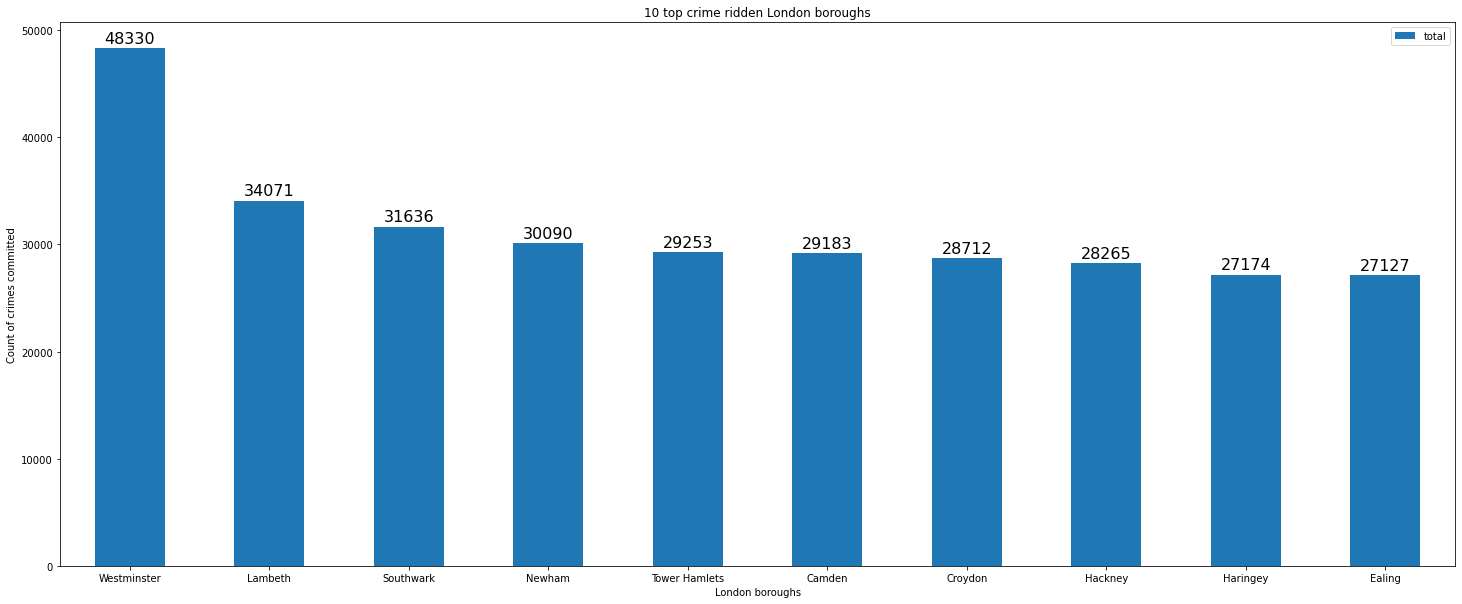

In [40]:
# Plotting the 10 top crime ridden boroughs
df_lon_crimes_top10 = df_lon_top10[['borough','total']]
df_lon_crimes_top10.set_index('borough',inplace = True)
ax = df_lon_crimes_top10.plot(kind='bar', figsize=(25, 10), rot =0)
ax.set_xlabel('London boroughs')
ax.set_ylabel('Count of crimes committed')
ax.set_title('10 top crime ridden London boroughs')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 16
               )
plt.show()

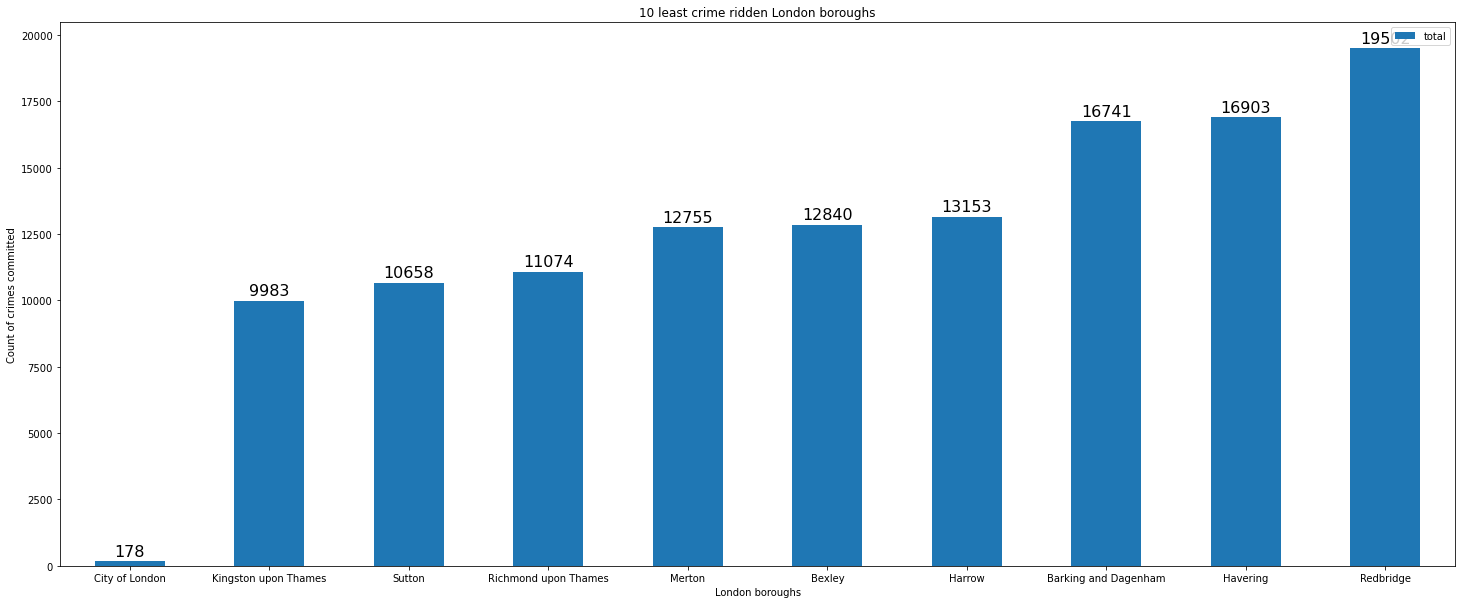

In [41]:
# Plotting the 10 least crime ridden boroughs
df_lon_crimes_least10 = df_lon_least10[['borough','total']]
df_lon_crimes_least10.set_index('borough',inplace = True)
ax = df_lon_crimes_least10.plot(kind='bar', figsize=(25, 10), rot =0)
ax.set_xlabel('London boroughs')
ax.set_ylabel('Count of crimes committed')
ax.set_title('10 least crime ridden London boroughs')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 16
               )
plt.show()

### Conclusions 
* **The 10 top crime ridden boroughs have to be avoided by anyone new coming to reside in London**
* **The 10 least crime ridden boroughs should be considered for residing by a newcomer**
* **City of London is the 33rd principal division of Greater London but it is not a London borough so for the purpose of this project, Kingston upon Thames will be analysed instead for neighbourhoods*** 
* ***Source - https://en.wikipedia.org/wiki/List_of_London_boroughs**

## Part 4 - Analyzing the least crime ridden borough (Kingston upon Thames) of London for neighbourhoods

Location of data: https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames

In [42]:
# Creating a DataFrame for crimes in Kingston
df_kingston = df_lon_least10[1:2]
df_kingston = df_kingston [['borough', 'burglary', 'criminal_damage', 'drugs', 'other_notifiable_offences', 'robbery', 'theft_and_handling','violence_against_the_person']]
df_kingston.set_index('borough', inplace = True)
df_kingston.head()

,burglary,criminal_damage,drugs,other_notifiable_offences,robbery,theft_and_handling,violence_against_the_person
borough,,,,,,,
Kingston upon Thames,879,1054,743,189,121,3803,3194


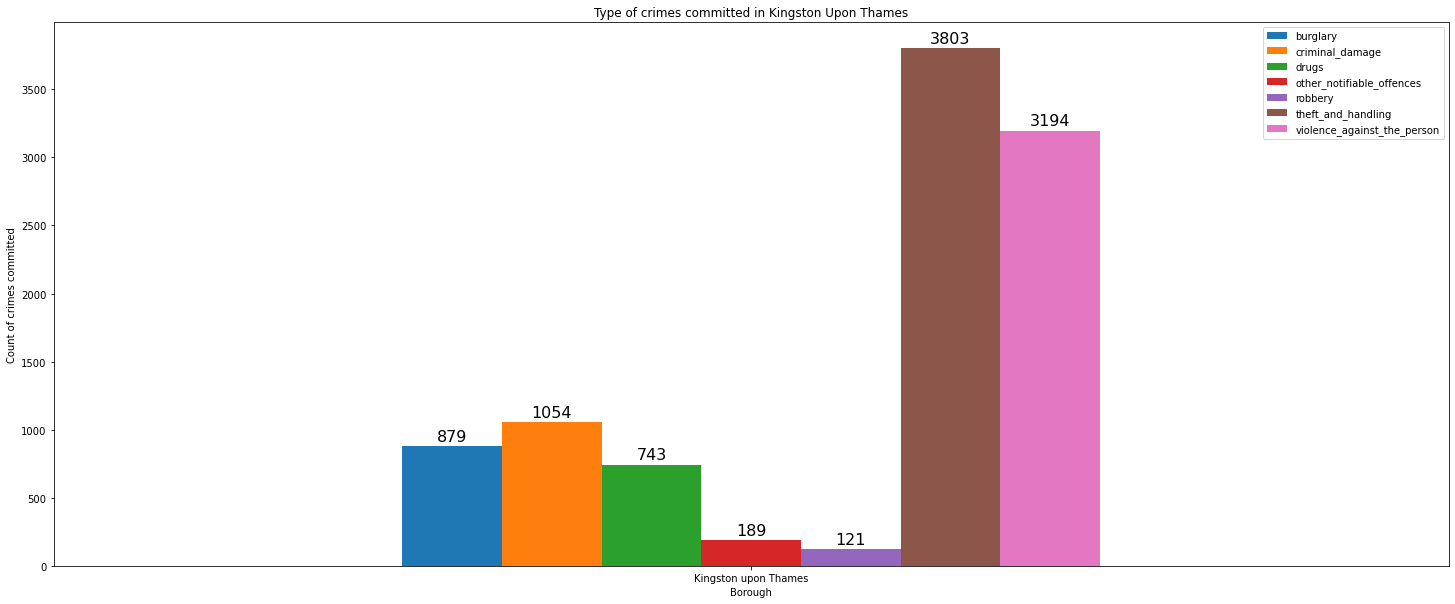

In [43]:
# Plotting the created DataFrame
ax = df_kingston.plot(kind='bar', figsize=(25, 10), rot=0)
ax.set_ylabel('Count of crimes committed')
ax.set_xlabel('Borough')
ax.set_title('Type of crimes committed in Kingston Upon Thames')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 16
               )
plt.show()

In [44]:
df_kingston

,burglary,criminal_damage,drugs,other_notifiable_offences,robbery,theft_and_handling,violence_against_the_person
borough,,,,,,,
Kingston upon Thames,879,1054,743,189,121,3803,3194


In [45]:
# Using 'https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames' to create a DataFrame for Neighbourhoods
Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']
kingston_neigh = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames','Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton','Old Malden','Seething Wells','Surbiton','Tolworth']
Latitudes = []
Longitudes = []
for k in range(len(kingston_neigh)):
    address = '{},London,United Kingdom'.format(kingston_neigh[k])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitudes.append(location.latitude)
    Longitudes.append(location.longitude)
kut_neigh = {'Neighbourhood': kingston_neigh,'Borough':Borough,'Latitudes': Latitudes,'Longitudes':Longitudes}
df_kingston_neigh = pd.DataFrame(data=kut_neigh, columns=['Neighbourhood', 'Borough', 'Latitudes', 'Longitudes'], index=None)
df_kingston_neigh

,Neighbourhood,Borough,Latitudes,Longitudes
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


In [46]:
# Creating a map of Kingston Upon Thames using the using random coordinates from the DataFrame (say Tolworth)
kingston_map = folium.Map(location=[51.378876, -0.282860], zoom_start=12)
for lati, longi, boro, neig in zip(df_kingston_neigh['Latitudes'], df_kingston_neigh['Longitudes'], df_kingston_neigh['Borough'], df_kingston_neigh['Neighbourhood']):
    lab = '{}, {}'.format(neig, boro)
    lab = folium.Popup(lab, parse_html=True)
    folium.CircleMarker(
        [lati, longi],
        radius=5,
        popup=lab,
        color='red',
        fill=True,
        fill_color='#fffc4a',
        fill_opacity=0.6,
        parse_html=False).add_to(kingston_map)  
kingston_map

### Using Foursquare to analyze neighbourhoods within 1 km (1000m)

In [47]:
# Listing Foursquare credentials
client_id = 'L5CQWSEYKAAVGX5TBPUGCZDHY3W30HSRCTGO4HPDXRVDMORG'
client_secret = 'W0AJ1JOCNXF0JWCDLWPCPIS5QP4JCYKZXTDZXAX30IJPQ55Y'
version = '20180604'
limit = 30

In [48]:
# Defining a function to get venues for above neighbourhoods
def kingston_venues(locales, lati, longi, radius=1000):
    kingston_venuelist=[]
    for loc, lat, long in zip(locales, lati, longi):
        print(loc)    
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            version, 
            lat, 
            long, 
            radius, 
            limit)
          
        results = requests.get(url).json()["response"]['groups'][0]['items']
        kingston_venuelist.append([(
            loc, 
            lat, 
            long, 
            k['venue']['name'], 
            k['venue']['location']['lat'], 
            k['venue']['location']['lng'],  
            k['venue']['categories'][0]['name']) for k in results])

    kingston_closeby_venues = pd.DataFrame([item for k in kingston_venuelist for item in k])
    kingston_closeby_venues.columns = ['Neighbourhood', 
                  'Latitudes_neighbourhood', 
                  'Longitudes_neighbourhood', 
                  'Venue', 
                  'Latitudes_venue', 
                  'Longitudes_venue', 
                  'Category_venue']
    return(kingston_closeby_venues)

In [49]:
# Creating a DataFrame using the function defined above
df_kingston_venues = kingston_venues(locales=df_kingston_neigh['Neighbourhood'], lati=df_kingston_neigh['Latitudes'], longi=df_kingston_neigh['Longitudes'])

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [50]:
df_kingston_venues.shape

(311, 7)

In [51]:
df_kingston_venues.head()

,Neighbourhood,Latitudes_neighbourhood,Longitudes_neighbourhood,Venue,Latitudes_venue,Longitudes_venue,Category_venue
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Jean's Cafe,51.393214,-0.296070,Coffee Shop
2,Berrylands,51.393781,-0.284802,The Berrylands Pub,51.398169,-0.280365,Pub
3,Berrylands,51.393781,-0.284802,Prince of Wales,51.389642,-0.297580,Pub
4,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop


In [52]:
# Creating a DataFrame to look closely at venue categories for every neighbourhood
df_kingston_tranformed = pd.get_dummies(df_kingston_venues[['Category_venue']], prefix="", prefix_sep="")
df_kingston_tranformed['Neighbourhood'] = df_kingston_venues['Neighbourhood'] 
move_column = [df_kingston_tranformed.columns[-1]] + list(df_kingston_tranformed.columns[:-1])
df_kingston_tranformed = df_kingston_tranformed[move_column]
df_kingston_grouped = df_kingston_tranformed.groupby('Neighbourhood').mean().reset_index()
df_kingston_grouped.head()

,Neighbourhood,Aquarium,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Beer Bar,Bistro,Bookstore,Bowling Alley,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Trail,Train Station,Turkish Restaurant,Zoo Exhibit
0,Berrylands,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.000000,0.0
1,Canbury,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.000000,0.033333,0.0
2,Chessington,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.222222,0.000000,0.0
3,Coombe,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,Hook,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.076923,0.000000,0.0


In [53]:
df_kingston_grouped.shape

(15, 85)

In [54]:
# Defining a function for creating a DataFrame with 15 common venues of the neighbourhoods
def kingston_common_venues (item, number):
    item_cat_1 = item.iloc[1:]
    item_cat_2 = item_cat_1.sort_values(ascending=False)
    
    return item_cat_2.index.values[0:number]

In [55]:
# Creating a DataFrame that lists 15 common venues of the Kingston neighbourhoods
number = 15
columns = ['Neighbourhood']
for k in np.arange(number):
    try:
        columns.append('Top venue number {}{}'.format(k+1))
    except:
        columns.append('Top venue number {}'.format(k+1))
df_kingston_common_venues = pd.DataFrame(columns=columns)
df_kingston_common_venues['Neighbourhood'] = df_kingston_grouped['Neighbourhood']
for i in np.arange(df_kingston_grouped.shape[0]):
    df_kingston_common_venues.iloc[i, 1:] = kingston_common_venues(df_kingston_grouped.iloc[i, :], number)
df_kingston_common_venues

,Neighbourhood,Top venue number 1,Top venue number 2,Top venue number 3,Top venue number 4,Top venue number 5,Top venue number 6,Top venue number 7,Top venue number 8,Top venue number 9,Top venue number 10,Top venue number 11,Top venue number 12,Top venue number 13,Top venue number 14,Top venue number 15
0,Berrylands,Coffee Shop,Park,Pub,Gym / Fitness Center,Train Station,Platform,College Soccer Field,Bus Stop,Farmers Market,Department Store,Discount Store,Electronics Store,English Restaurant,Fast Food Restaurant,Fish & Chips Shop
1,Canbury,Café,Pub,Thai Restaurant,Sushi Restaurant,Coffee Shop,Hotel,French Restaurant,Turkish Restaurant,Fish & Chips Shop,Record Shop,Japanese Restaurant,Gym / Fitness Center,Market,Electronics Store,Park
2,Chessington,Train Station,Supermarket,Breakfast Spot,Platform,Fast Food Restaurant,Building,Convenience Store,Golf Course,Garden Center,Farmers Market,Deli / Bodega,Department Store,Discount Store,Electronics Store,English Restaurant
3,Coombe,Hotel,Golf Course,Stables,Zoo Exhibit,Fish & Chips Shop,Deli / Bodega,Department Store,Discount Store,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,French Restaurant,Convenience Store,Fried Chicken Joint
4,Hook,Supermarket,Convenience Store,Breakfast Spot,Park,Chinese Restaurant,Fast Food Restaurant,Fish & Chips Shop,Grocery Store,Platform,Train Station,Bakery,English Restaurant,Department Store,Discount Store,Electronics Store
5,Kingston Vale,Coffee Shop,Bus Stop,Outdoors & Recreation,Sandwich Place,Soccer Field,Stables,Grocery Store,Bar,Bistro,French Restaurant,Discount Store,Electronics Store,English Restaurant,Arts & Crafts Store,Farmers Market
6,Kingston upon Thames,Café,Pub,Coffee Shop,Sushi Restaurant,Burger Joint,Record Shop,Gift Shop,Cajun / Creole Restaurant,Department Store,French Restaurant,Supermarket,German Restaurant,Market,Furniture / Home Store,Beer Bar
7,Malden Rushett,Theme Park Ride / Attraction,Pub,Zoo Exhibit,Restaurant,Fast Food Restaurant,Fried Chicken Joint,Garden Center,Grocery Store,Hotel,Aquarium,Theater,Theme Park,Tapas Restaurant,English Restaurant,Convenience Store
8,Motspur Park,Park,Pub,Bus Stop,Steakhouse,Mediterranean Restaurant,Korean Restaurant,Rugby Pitch,Japanese Restaurant,Soccer Field,Cosmetics Shop,Grocery Store,Furniture / Home Store,Train Station,Trail,Tennis Court
9,New Malden,Korean Restaurant,Supermarket,Grocery Store,Coffee Shop,Gym Pool,Café,Fish & Chips Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Fast Food Restaurant,Pharmacy,Portuguese Restaurant,Clothing Store


### Clustering identical neighbourhoods using K-means and analysing them

In [56]:
# Performing k-means clustering
neigh_k = 6
df_kingston_neigh_clusters = df_kingston_grouped.drop('Neighbourhood', 1)
kingston_kmeans = KMeans(n_clusters=neigh_k, random_state=0).fit(df_kingston_neigh_clusters)
kingston_kmeans.labels_[0:10]

array([4, 0, 2, 5, 2, 3, 0, 1, 4, 0])

In [57]:
# Adding clusters information to the merged DataFrame
df_kingston_common_venues.insert(0, 'Labels', kingston_kmeans.labels_)
df_kingston_merged = df_kingston_neigh
df_kingston_merged = df_kingston_neigh.join(df_kingston_common_venues.set_index('Neighbourhood'), on='Neighbourhood')
df_kingston_merged

,Neighbourhood,Borough,Latitudes,Longitudes,Labels,Top venue number 1,Top venue number 2,Top venue number 3,Top venue number 4,Top venue number 5,Top venue number 6,Top venue number 7,Top venue number 8,Top venue number 9,Top venue number 10,Top venue number 11,Top venue number 12,Top venue number 13,Top venue number 14,Top venue number 15
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,4,Coffee Shop,Park,Pub,Gym / Fitness Center,Train Station,Platform,College Soccer Field,Bus Stop,Farmers Market,Department Store,Discount Store,Electronics Store,English Restaurant,Fast Food Restaurant,Fish & Chips Shop
1,Canbury,Kingston upon Thames,51.417499,-0.305553,0,Café,Pub,Thai Restaurant,Sushi Restaurant,Coffee Shop,Hotel,French Restaurant,Turkish Restaurant,Fish & Chips Shop,Record Shop,Japanese Restaurant,Gym / Fitness Center,Market,Electronics Store,Park
2,Chessington,Kingston upon Thames,51.358336,-0.298622,2,Train Station,Supermarket,Breakfast Spot,Platform,Fast Food Restaurant,Building,Convenience Store,Golf Course,Garden Center,Farmers Market,Deli / Bodega,Department Store,Discount Store,Electronics Store,English Restaurant
3,Coombe,Kingston upon Thames,51.419450,-0.265398,5,Hotel,Golf Course,Stables,Zoo Exhibit,Fish & Chips Shop,Deli / Bodega,Department Store,Discount Store,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,French Restaurant,Convenience Store,Fried Chicken Joint
4,Hook,Kingston upon Thames,51.367898,-0.307145,2,Supermarket,Convenience Store,Breakfast Spot,Park,Chinese Restaurant,Fast Food Restaurant,Fish & Chips Shop,Grocery Store,Platform,Train Station,Bakery,English Restaurant,Department Store,Discount Store,Electronics Store
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,0,Café,Pub,Coffee Shop,Sushi Restaurant,Burger Joint,Record Shop,Gift Shop,Cajun / Creole Restaurant,Department Store,French Restaurant,Supermarket,German Restaurant,Market,Furniture / Home Store,Beer Bar
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,3,Coffee Shop,Bus Stop,Outdoors & Recreation,Sandwich Place,Soccer Field,Stables,Grocery Store,Bar,Bistro,French Restaurant,Discount Store,Electronics Store,English Restaurant,Arts & Crafts Store,Farmers Market
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,1,Theme Park Ride / Attraction,Pub,Zoo Exhibit,Restaurant,Fast Food Restaurant,Fried Chicken Joint,Garden Center,Grocery Store,Hotel,Aquarium,Theater,Theme Park,Tapas Restaurant,English Restaurant,Convenience Store
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,4,Park,Pub,Bus Stop,Steakhouse,Mediterranean Restaurant,Korean Restaurant,Rugby Pitch,Japanese Restaurant,Soccer Field,Cosmetics Shop,Grocery Store,Furniture / Home Store,Train Station,Trail,Tennis Court
9,New Malden,Kingston upon Thames,51.405335,-0.263407,0,Korean Restaurant,Supermarket,Grocery Store,Coffee Shop,Gym Pool,Café,Fish & Chips Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Fast Food Restaurant,Pharmacy,Portuguese Restaurant,Clothing Store


In [58]:
df_kingston_merged.shape

(15, 20)

In [59]:
# Creating visualization for clusters generated using Berrylands as the central point
kingston_clusters_map = folium.Map(location=[51.393781, -0.284802], zoom_start=12)
x = np.arange(neigh_k)
ys = [i + x + (i*x)**2 for i in range(neigh_k)]
colors_array = mpcm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [cols.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(df_kingston_merged['Latitudes'], df_kingston_merged['Longitudes'], df_kingston_merged['Neighbourhood'], df_kingston_merged['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(kingston_clusters_map)
       
kingston_clusters_map

In [60]:
df_kingston_merged[df_kingston_merged['Labels'] == 0]

,Neighbourhood,Borough,Latitudes,Longitudes,Labels,Top venue number 1,Top venue number 2,Top venue number 3,Top venue number 4,Top venue number 5,Top venue number 6,Top venue number 7,Top venue number 8,Top venue number 9,Top venue number 10,Top venue number 11,Top venue number 12,Top venue number 13,Top venue number 14,Top venue number 15
1,Canbury,Kingston upon Thames,51.417499,-0.305553,0,Café,Pub,Thai Restaurant,Sushi Restaurant,Coffee Shop,Hotel,French Restaurant,Turkish Restaurant,Fish & Chips Shop,Record Shop,Japanese Restaurant,Gym / Fitness Center,Market,Electronics Store,Park
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,0,Café,Pub,Coffee Shop,Sushi Restaurant,Burger Joint,Record Shop,Gift Shop,Cajun / Creole Restaurant,Department Store,French Restaurant,Supermarket,German Restaurant,Market,Furniture / Home Store,Beer Bar
9,New Malden,Kingston upon Thames,51.405335,-0.263407,0,Korean Restaurant,Supermarket,Grocery Store,Coffee Shop,Gym Pool,Café,Fish & Chips Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Fast Food Restaurant,Pharmacy,Portuguese Restaurant,Clothing Store
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,0,Pub,Thai Restaurant,Italian Restaurant,Indian Restaurant,Gastropub,Bar,Burger Joint,Public Art,Arts & Crafts Store,Rock Club,Ice Cream Shop,Café,Seafood Restaurant,Japanese Restaurant,Soccer Stadium
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,0,Coffee Shop,Pub,Gastropub,Indian Restaurant,French Restaurant,Park,Deli / Bodega,Restaurant,Farmers Market,Chinese Restaurant,Fish & Chips Shop,Pet Café,Pharmacy,Supermarket,Gym / Fitness Center
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,0,Coffee Shop,Pub,Park,Chinese Restaurant,Grocery Store,Gym,Gym / Fitness Center,French Restaurant,Indian Restaurant,Italian Restaurant,Fish & Chips Shop,Pet Café,Deli / Bodega,Restaurant,Gastropub


In [61]:
df_kingston_merged[df_kingston_merged['Labels'] == 1]

,Neighbourhood,Borough,Latitudes,Longitudes,Labels,Top venue number 1,Top venue number 2,Top venue number 3,Top venue number 4,Top venue number 5,Top venue number 6,Top venue number 7,Top venue number 8,Top venue number 9,Top venue number 10,Top venue number 11,Top venue number 12,Top venue number 13,Top venue number 14,Top venue number 15
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,1,Theme Park Ride / Attraction,Pub,Zoo Exhibit,Restaurant,Fast Food Restaurant,Fried Chicken Joint,Garden Center,Grocery Store,Hotel,Aquarium,Theater,Theme Park,Tapas Restaurant,English Restaurant,Convenience Store


In [62]:
df_kingston_merged[df_kingston_merged['Labels'] == 2]

,Neighbourhood,Borough,Latitudes,Longitudes,Labels,Top venue number 1,Top venue number 2,Top venue number 3,Top venue number 4,Top venue number 5,Top venue number 6,Top venue number 7,Top venue number 8,Top venue number 9,Top venue number 10,Top venue number 11,Top venue number 12,Top venue number 13,Top venue number 14,Top venue number 15
2,Chessington,Kingston upon Thames,51.358336,-0.298622,2,Train Station,Supermarket,Breakfast Spot,Platform,Fast Food Restaurant,Building,Convenience Store,Golf Course,Garden Center,Farmers Market,Deli / Bodega,Department Store,Discount Store,Electronics Store,English Restaurant
4,Hook,Kingston upon Thames,51.367898,-0.307145,2,Supermarket,Convenience Store,Breakfast Spot,Park,Chinese Restaurant,Fast Food Restaurant,Fish & Chips Shop,Grocery Store,Platform,Train Station,Bakery,English Restaurant,Department Store,Discount Store,Electronics Store


In [63]:
df_kingston_merged[df_kingston_merged['Labels'] == 3]

,Neighbourhood,Borough,Latitudes,Longitudes,Labels,Top venue number 1,Top venue number 2,Top venue number 3,Top venue number 4,Top venue number 5,Top venue number 6,Top venue number 7,Top venue number 8,Top venue number 9,Top venue number 10,Top venue number 11,Top venue number 12,Top venue number 13,Top venue number 14,Top venue number 15
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,3,Coffee Shop,Bus Stop,Outdoors & Recreation,Sandwich Place,Soccer Field,Stables,Grocery Store,Bar,Bistro,French Restaurant,Discount Store,Electronics Store,English Restaurant,Arts & Crafts Store,Farmers Market
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,3,Grocery Store,Soccer Field,Pharmacy,Garden Center,Bowling Alley,Climbing Gym,Sandwich Place,Bus Stop,Discount Store,Italian Restaurant,Indian Restaurant,Hotel,Coffee Shop,Restaurant,Pizza Place


In [64]:
df_kingston_merged[df_kingston_merged['Labels'] == 4]

,Neighbourhood,Borough,Latitudes,Longitudes,Labels,Top venue number 1,Top venue number 2,Top venue number 3,Top venue number 4,Top venue number 5,Top venue number 6,Top venue number 7,Top venue number 8,Top venue number 9,Top venue number 10,Top venue number 11,Top venue number 12,Top venue number 13,Top venue number 14,Top venue number 15
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,4,Coffee Shop,Park,Pub,Gym / Fitness Center,Train Station,Platform,College Soccer Field,Bus Stop,Farmers Market,Department Store,Discount Store,Electronics Store,English Restaurant,Fast Food Restaurant,Fish & Chips Shop
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,4,Park,Pub,Bus Stop,Steakhouse,Mediterranean Restaurant,Korean Restaurant,Rugby Pitch,Japanese Restaurant,Soccer Field,Cosmetics Shop,Grocery Store,Furniture / Home Store,Train Station,Trail,Tennis Court
11,Old Malden,Kingston upon Thames,51.382484,-0.259090,4,Train Station,Park,Platform,Gym / Fitness Center,Grocery Store,Bakery,Japanese Restaurant,English Restaurant,Steakhouse,Fast Food Restaurant,Department Store,Discount Store,Electronics Store,Farmers Market,Zoo Exhibit


In [65]:
df_kingston_merged[df_kingston_merged['Labels'] == 5]

,Neighbourhood,Borough,Latitudes,Longitudes,Labels,Top venue number 1,Top venue number 2,Top venue number 3,Top venue number 4,Top venue number 5,Top venue number 6,Top venue number 7,Top venue number 8,Top venue number 9,Top venue number 10,Top venue number 11,Top venue number 12,Top venue number 13,Top venue number 14,Top venue number 15
3,Coombe,Kingston upon Thames,51.41945,-0.265398,5,Hotel,Golf Course,Stables,Zoo Exhibit,Fish & Chips Shop,Deli / Bodega,Department Store,Discount Store,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,French Restaurant,Convenience Store,Fried Chicken Joint


## Part 4 - Results and Conclusion

The purpose of this project was to analyse the boroughs of London (UK) for safety based upon the criminal records available in public domain.
Based upon the analysis conducted, **Kingston Upon Thames has been identified as the safest borough in London** for anyone planning to move to one of the most iconic cities of the world.

The project's secondary aim was to analyze the neighbourhoods of the borough and cluster them based upon their venues to further help a newbie to select a neighbourhood based upon his / her individual preferences and tastes. Based upon the clustering done, **a choice of 6 clusters is available to choose from as per the below list: -**
* Cluster 1 - For individuals prefering pubs and coffee joints.
* Cluster 2 - For individuals prefering theme parks / attractions and pubs.
* Cluster 3 - For individuals prefering supermarkets, stores, and train station.
* Cluster 4 - For individuals prefering stores, coffee shop, bus stop, and soccer field.
* Cluster 5 - For individuals prefering park, pub, bus stop, and platform.
* Cluster 6 - For individuals prefering hotel and golf course.